We will use the daily data from cnecovid.

In [1]:
!wget -N https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_ccaa.csv

--2021-01-09 12:11:59--  https://cnecovid.isciii.es/covid19/resources/casos_diagnostico_ccaa.csv
Resolving cnecovid.isciii.es (cnecovid.isciii.es)... 193.146.50.165
Connecting to cnecovid.isciii.es (cnecovid.isciii.es)|193.146.50.165|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘casos_diagnostico_ccaa.csv’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_csv('casos_diagnostico_ccaa.csv', keep_default_na=False, na_values='', parse_dates=[1])
lastdate = df['fecha'].max() - pd.Timedelta('7 days')
df.head(10)

ccaa_iso      fecha  num_casos  num_casos_prueba_pcr  \
0       AN 2020-01-01          6                     4   
1       AR 2020-01-01          0                     0   
2       AS 2020-01-01          0                     0   
3       CB 2020-01-01          0                     0   
4       CE 2020-01-01          0                     0   
5       CL 2020-01-01          0                     0   
6       CM 2020-01-01          0                     0   
7       CN 2020-01-01          0                     0   
8       CT 2020-01-01         24                    24   
9       EX 2020-01-01          2                     1   

   num_casos_prueba_test_ac  num_casos_prueba_ag  num_casos_prueba_elisa  \
0                         0                    2                       0   
1                         0                    0                       0   
2                         0                    0                       0   
3                         0                    0                       0   
4                         0                    0                       0   
5                         0                    0                       0   
6                         0                    0                       0   
7                         0                    0                       0   
8                         0                    0                       0   
9                         0                    1                       0   

   num_casos_prueba_desconocida  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
5                             0  
6                             0  
7                             0  
8                             0  
9                             0

In [4]:
df_loc = pd.read_excel('SPANISH-CODES.xlsx', sheet_name='CCAA', keep_default_na=False, na_values='')
df_loc['COD_CCAA'] = df_loc['COD_CCAA'].apply(str.strip)
df_loc

COD_CCAA                     CCAA        LAT          LONG
0        AN                Andalucía  37.746222 -4.554982e+00
1        AR                   Aragón  41.655767 -8.993490e-01
2        AS  Asturias, Principado de  43.339126 -5.835657e+00
3        CN                 Canarias  28.472316 -1.629854e+01
4        CB                Cantabria  43.465773 -3.834682e+00
5        CM       Castilla-La Mancha  39.918263 -3.966983e+00
6        CL          Castilla y León  41.657179 -4.718616e+00
7        CT               Catalunya​  41.440183  2.146459e+00
8        EX              Extremadura  39.191439 -6.128023e+00
9        GA                 Galicia​  42.883738 -8.509078e+00
10       IB            Illes Balears  39.577944  2.650378e+00
11       RI                 La Rioja  42.454080 -2.438287e+06
12       MD      Comunidad de Madrid  40.422451 -3.697740e+00
13       MC         Región de Murcia  38.029986 -1.125442e+00
14       NC                  Navarra  42.837333 -1.637375e+00
15       PV               País Vasco  42.851582 -2.658177e+00
16       VC     Comunidad Valenciana  39.482401 -3.724340e-01
17       CE                    Ceuta  35.891943 -5.321092e+00
18       ML                  Melilla  35.298177 -2.938964e+00

Last check of our source dataframe.

In [5]:
df.count()

ccaa_iso                        7087
fecha                           7087
num_casos                       7087
num_casos_prueba_pcr            7087
num_casos_prueba_test_ac        7087
num_casos_prueba_ag             7087
num_casos_prueba_elisa          7087
num_casos_prueba_desconocida    7087
dtype: int64

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(index='fecha', columns='ccaa_iso', values=['num_casos'])
df_geo

num_casos                                                         \
ccaa_iso          AN   AR   AS   CB  CE   CL   CM   CN    CT   EX   GA   IB   
fecha                                                                         
2020-01-01         6    0    0    0   0    0    0    0    24    2    3    1   
2020-01-02         4    0    0    0   0    0    0    1    34    0    5    2   
2020-01-03         2    3    0    0   0    0    0    0    28    1    2    4   
2020-01-04         1    2    0    0   1    0    0    0    12    0    2    4   
2020-01-05         0    1    0    0   0    0    0    0     3    0    0    2   
...              ...  ...  ...  ...  ..  ...  ...  ...   ...  ...  ...  ...   
2021-01-03       967  256  186  146  14  825  436  196  1260  892  833  518   
2021-01-04      1674  231   11   35  12  559  326  111  3049  297  294  398   
2021-01-05      2266  266    3   24  12  499  335   76  3694  155  130  198   
2021-01-06       480  223    1    5   2  166   77   62   766   10   14   74   
2021-01-07         0    0    0    0   1    0    0    0     0    0    0    1   

                                               
ccaa_iso     MC    MD  ML   NC   PV   RI   VC  
fecha                                          
2020-01-01    0    21   0    0    0    0    4  
2020-01-02    0    16   0    0    0    1    0  
2020-01-03    0    13   0    0    0    1    1  
2020-01-04    0    10   0    0    0    0    1  
2020-01-05    0     2   0    0    0    0    2  
...         ...   ...  ..  ...  ...  ...  ...  
2021-01-03  369   755  14  109  374  104  780  
2021-01-04    2  3105  27  109  201   41  736  
2021-01-05    0  5959  16   80  213   59  251  
2021-01-06    0   906   2   56  149    4    0  
2021-01-07    0     0   0    0    0    0    0  

[373 rows x 19 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

num_casos                                                          \
ccaa_iso          AN   AR   AS   CB   CE   CL   CM   CN    CT   EX   GA   IB   
2020-01-01       6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  24.0  2.0  3.0  1.0   
2020-01-02       4.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  34.0  0.0  5.0  2.0   
2020-01-03       2.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  28.0  1.0  2.0  4.0   
2020-01-04       1.0  2.0  0.0  0.0  1.0  0.0  0.0  0.0  12.0  0.0  2.0  4.0   
2020-01-05       0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   3.0  0.0  0.0  2.0   
...              ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
2022-01-03       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN   
2022-01-04       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN   
2022-01-05       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN   
2022-01-06       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN   
2022-01-07       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN   

                                                
ccaa_iso     MC    MD   ML   NC   PV   RI   VC  
2020-01-01  0.0  21.0  0.0  0.0  0.0  0.0  4.0  
2020-01-02  0.0  16.0  0.0  0.0  0.0  1.0  0.0  
2020-01-03  0.0  13.0  0.0  0.0  0.0  1.0  1.0  
2020-01-04  0.0  10.0  0.0  0.0  0.0  0.0  1.0  
2020-01-05  0.0   2.0  0.0  0.0  0.0  0.0  2.0  
...         ...   ...  ...  ...  ...  ...  ...  
2022-01-03  NaN   NaN  NaN  NaN  NaN  NaN  NaN  
2022-01-04  NaN   NaN  NaN  NaN  NaN  NaN  NaN  
2022-01-05  NaN   NaN  NaN  NaN  NaN  NaN  NaN  
2022-01-06  NaN   NaN  NaN  NaN  NaN  NaN  NaN  
2022-01-07  NaN   NaN  NaN  NaN  NaN  NaN  NaN  

[738 rows x 19 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [8]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    738.000000
mean     368.500000
std      213.186538
min        0.000000
25%      184.250000
50%      368.500000
75%      552.750000
max      737.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [9]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [10]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for Andalucía (AN)
Minimum number of cases is 2
Wave 01 beta  9.152 mu  81 fit 0.870 peak 2020-03-22 from 2020-03-02 to 2020-05-28 size 12680
Wave 02 beta  2.233 mu  82 fit 0.593 peak 2020-03-23 from 2020-03-20 to 2020-04-04 size 329
Wave 03 beta 13.817 mu 146 fit 0.792 peak 2020-05-26 from 2020-05-05 to 2020-07-10 size 359
Wave 04 beta  8.301 mu 180 fit 0.749 peak 2020-06-29 from 2020-06-15 to 2020-08-04 size 575
Wave 05 beta 10.137 mu 205 fit 0.857 peak 2020-07-24 from 2020-07-04 to 2020-09-18 size 2380
Wave 06 beta 20.497 mu 245 fit 0.856 peak 2020-09-02 from 2020-07-17 to 2021-02-11 size 54106
Wave 07 beta 10.217 mu 264 fit 0.828 peak 2020-09-21 from 2020-08-30 to 2020-12-03 size 11428
Wave 08 beta  8.195 mu 277 fit 0.891 peak 2020-10-04 from 2020-09-16 to 2020-12-01 size 9590
Wave 09 beta 11.407 mu 307 fit 0.897 peak 2020-11-03 from 2020-10-06 to 2021-02-20 size 164591
Wave 10 beta  6.876 mu 286 fit 0.645 peak 2020-10-13 from 2020-09-27 to 2020-12-08

Wave 07 beta  5.173 mu 259 fit 0.942 peak 2020-09-16 from 2020-09-07 to 2020-10-13 size 851
Wave 08 beta  5.742 mu 270 fit 0.903 peak 2020-09-27 from 2020-09-16 to 2020-10-29 size 1436
Wave 09 beta  4.674 mu 279 fit 0.881 peak 2020-10-06 from 2020-09-28 to 2020-10-30 size 752
Wave 10 beta  7.151 mu 292 fit 0.876 peak 2020-10-19 from 2020-10-05 to 2020-11-27 size 1620
Wave 11 beta 13.522 mu 314 fit 0.897 peak 2020-11-10 from 2020-10-14 to 2021-01-27 size 4260
Wave 12 beta 13.188 mu 344 fit 0.899 peak 2020-12-10 from 2020-11-13 to 2021-02-23 size 3832
Wave 13 beta  6.376 mu 344 fit 0.788 peak 2020-12-10 from 2020-11-28 to 2021-01-11 size 894
Wave 14 beta  5.874 mu 355 fit 0.862 peak 2020-12-21 from 2020-12-10 to 2021-01-23 size 1513
--- no data for wave
Running multiple wave analysis for Catalunya​ (CT)
Minimum number of cases is 2
Wave 01 beta 13.632 mu  86 fit 0.756 peak 2020-03-27 from 2020-02-24 to 2020-07-20 size 60238
Wave 02 beta  4.202 mu 160 fit 0.913 peak 2020-06-09 from 2020-0

Running multiple wave analysis for Navarra (NC)
Minimum number of cases is 2
Wave 01 beta 11.605 mu  84 fit 0.844 peak 2020-03-25 from 2020-03-01 to 2020-06-04 size 5412
Wave 02 beta  2.929 mu  76 fit 0.378 peak 2020-03-17 from 2020-03-13 to 2020-03-28 size 97
Wave 03 beta  8.234 mu 175 fit 0.610 peak 2020-06-24 from 2020-06-12 to 2020-07-20 size 184
Wave 04 beta 10.284 mu 207 fit 0.850 peak 2020-07-26 from 2020-07-06 to 2020-09-19 size 2054
Wave 05 beta  7.993 mu 226 fit 0.906 peak 2020-08-14 from 2020-07-30 to 2020-09-27 size 1685
Wave 06 beta  9.038 mu 246 fit 0.893 peak 2020-09-03 from 2020-08-15 to 2020-10-28 size 3699
Wave 07 beta  8.098 mu 260 fit 0.926 peak 2020-09-17 from 2020-08-31 to 2020-11-09 size 5328
Wave 08 beta  6.168 mu 272 fit 0.929 peak 2020-09-29 from 2020-09-17 to 2020-11-06 size 2509
Wave 09 beta  8.800 mu 289 fit 0.896 peak 2020-10-16 from 2020-09-27 to 2020-12-18 size 10479
Wave 10 beta  6.393 mu 299 fit 0.900 peak 2020-10-26 from 2020-10-13 to 2020-12-07 size 

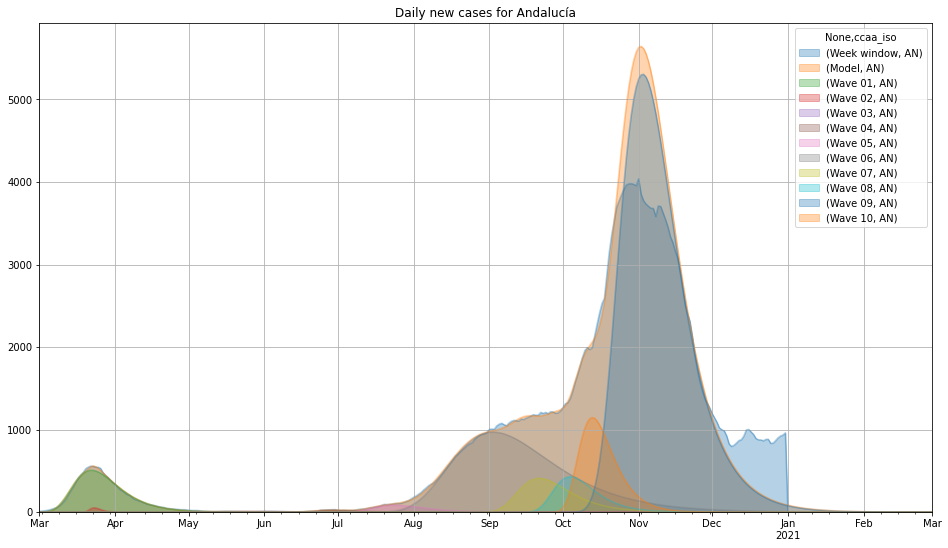

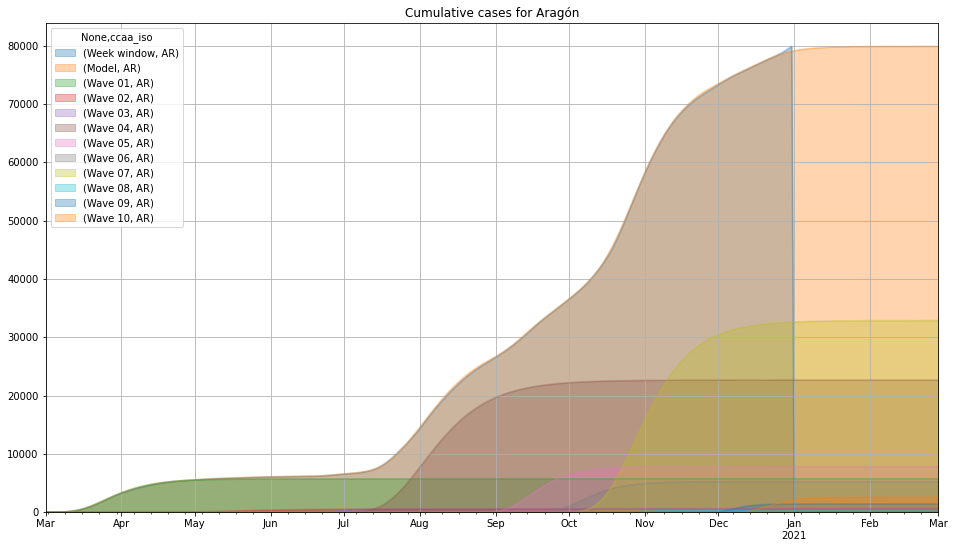

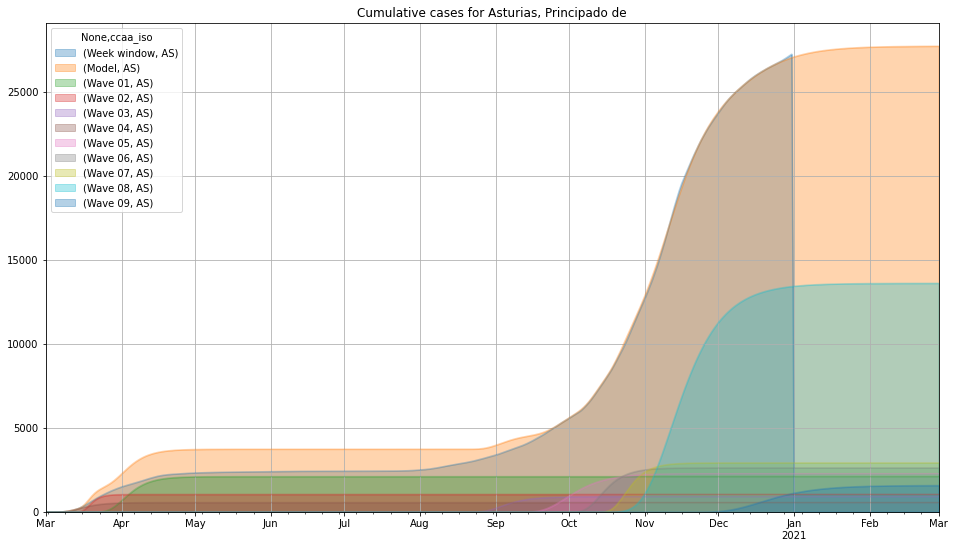

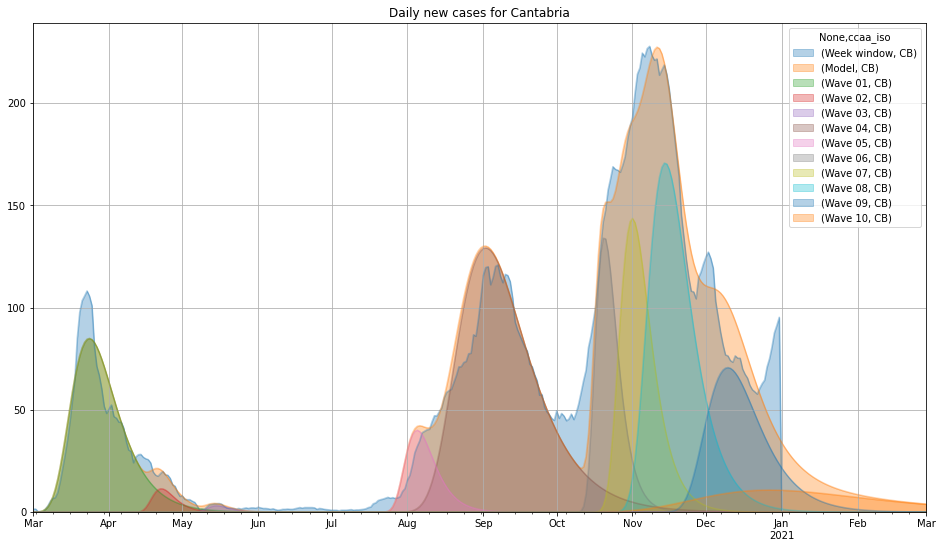

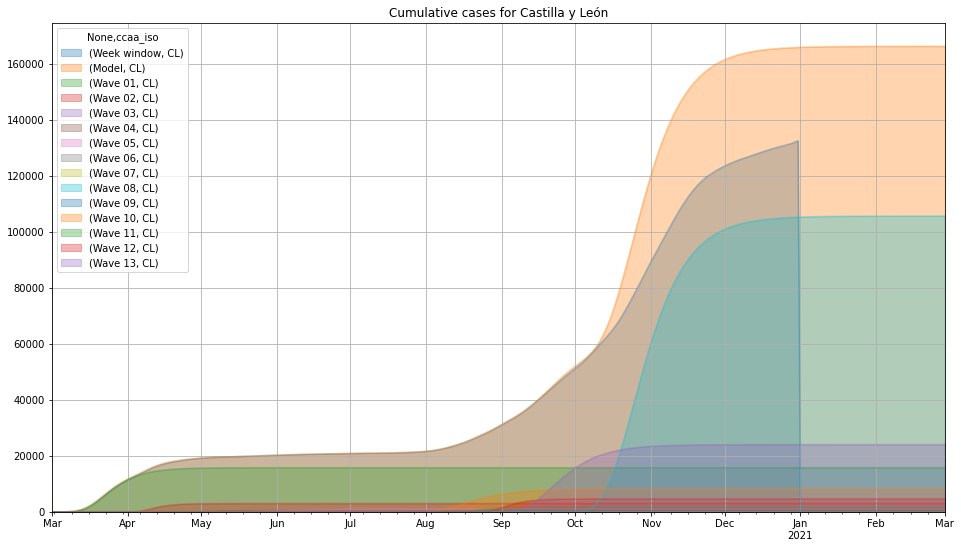

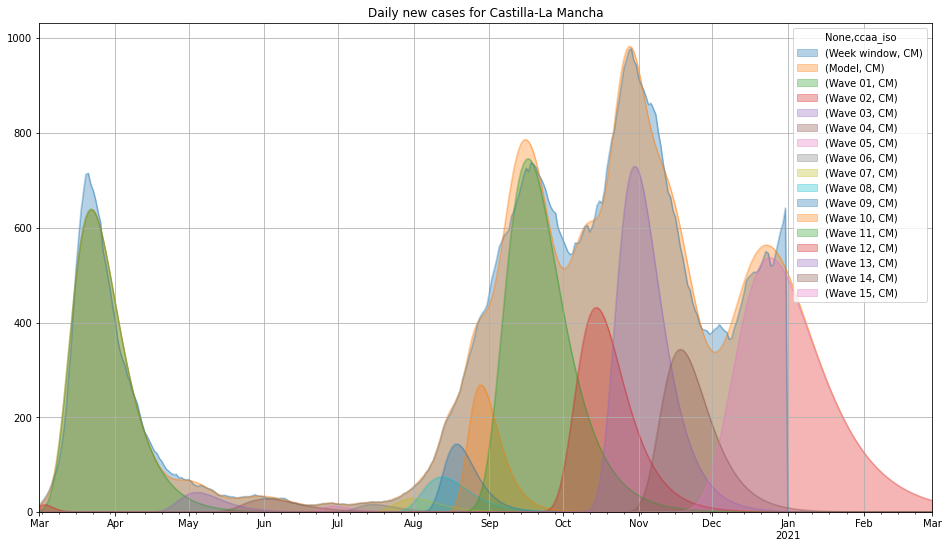

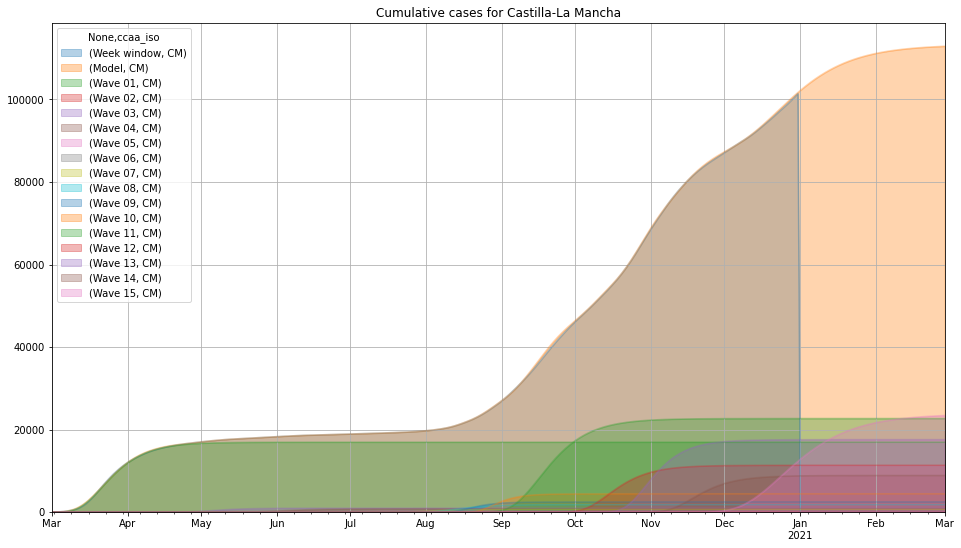

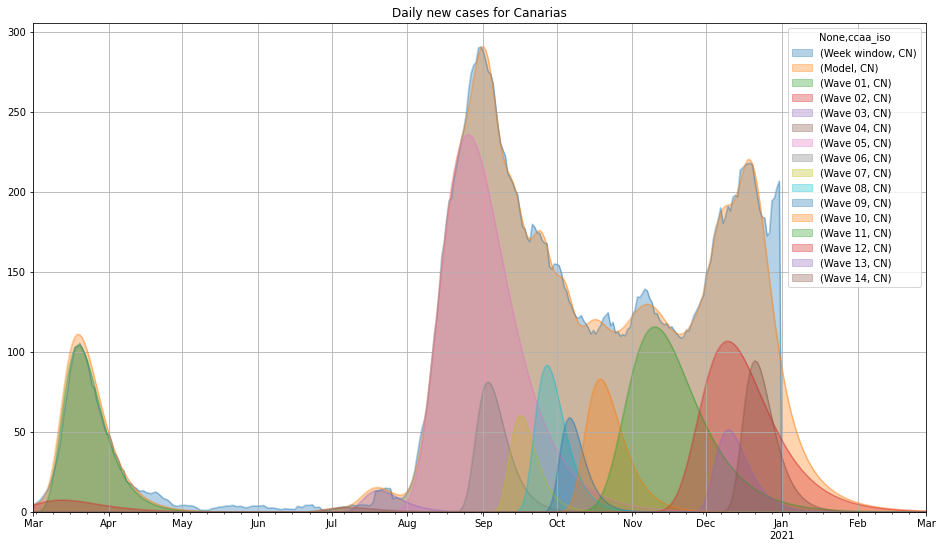

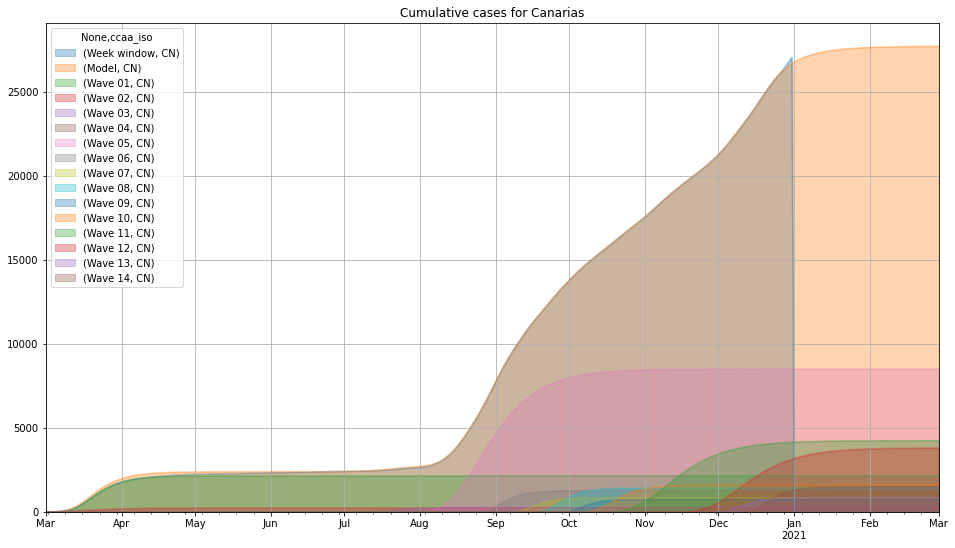

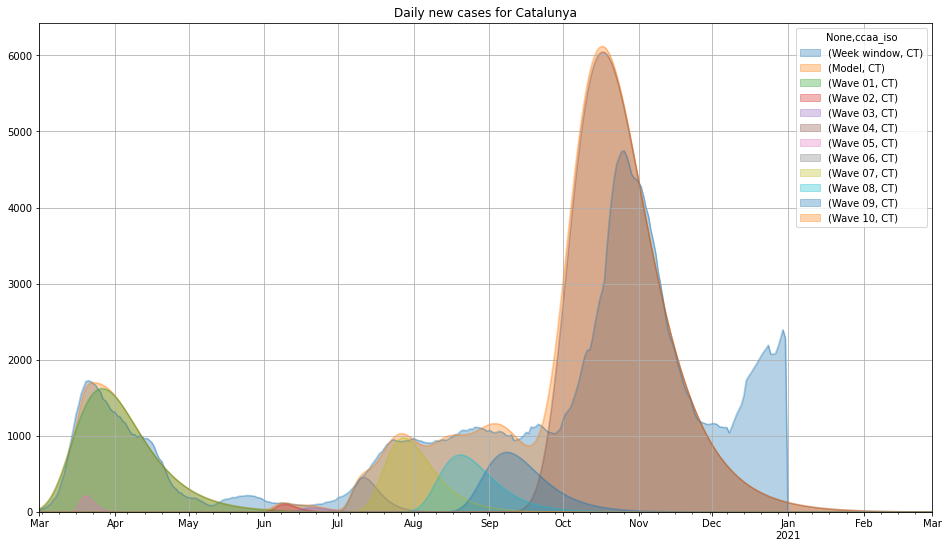

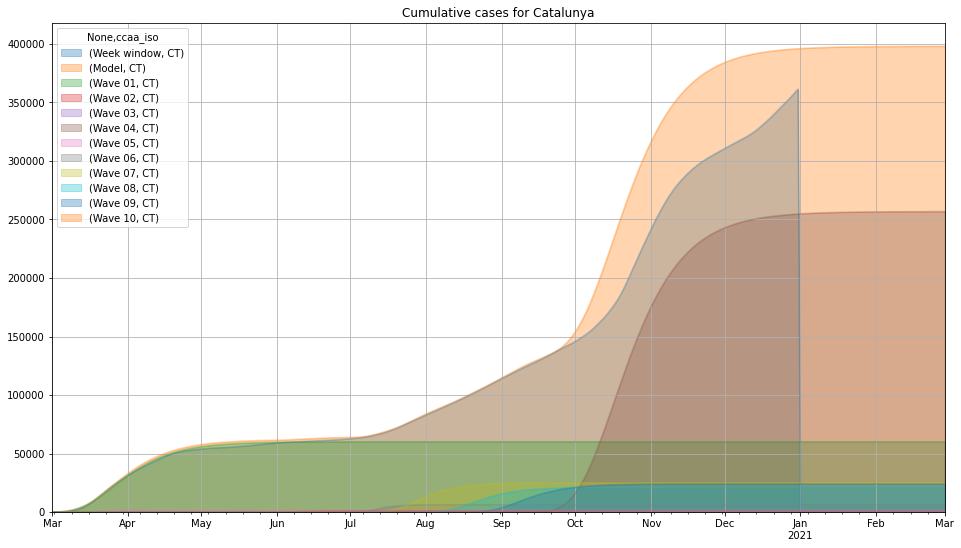

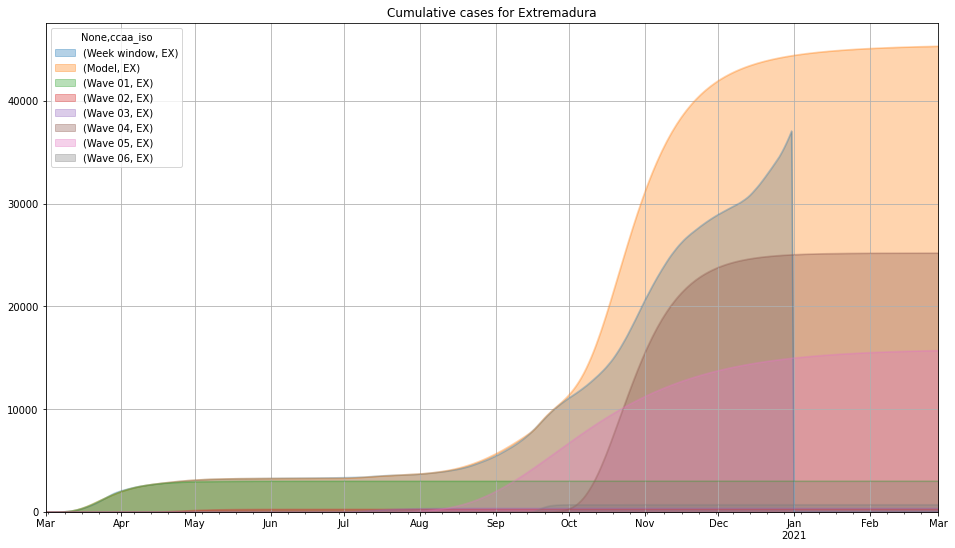

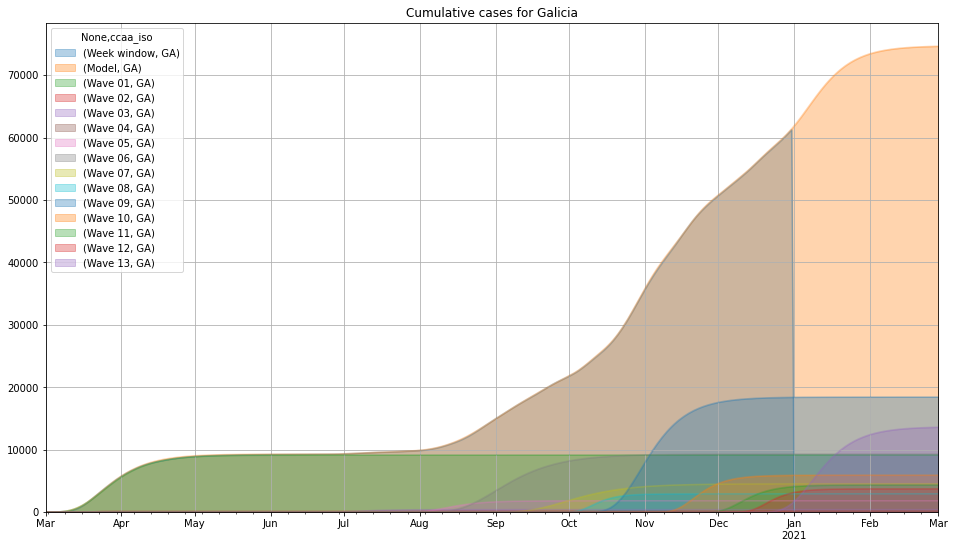

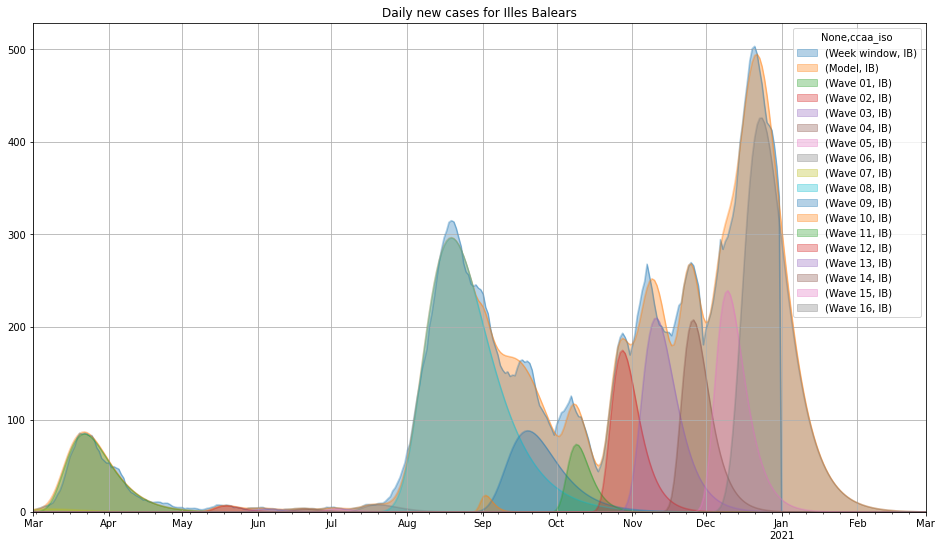

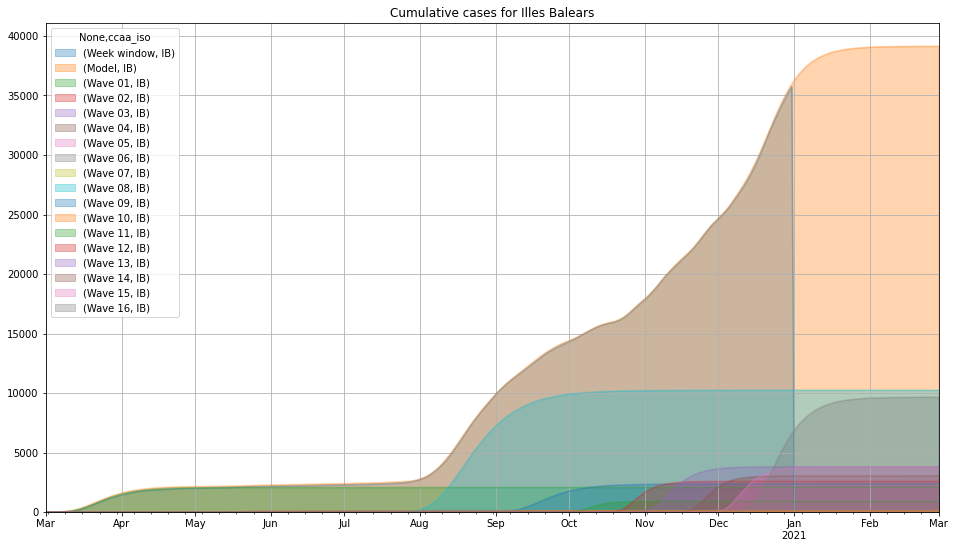

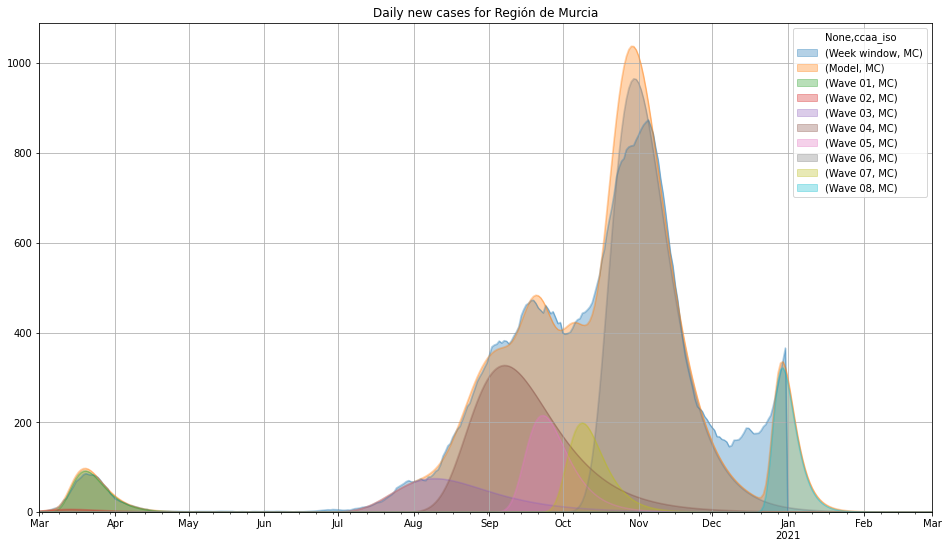

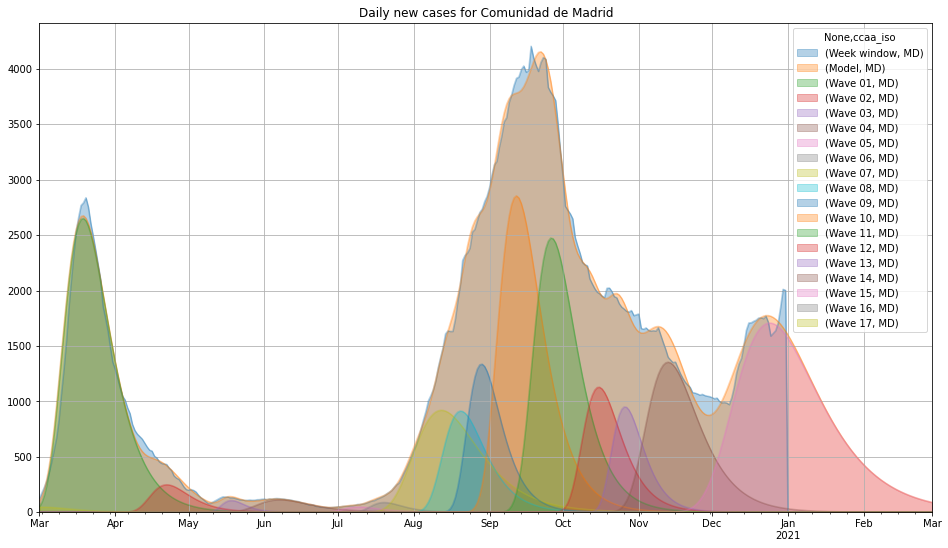

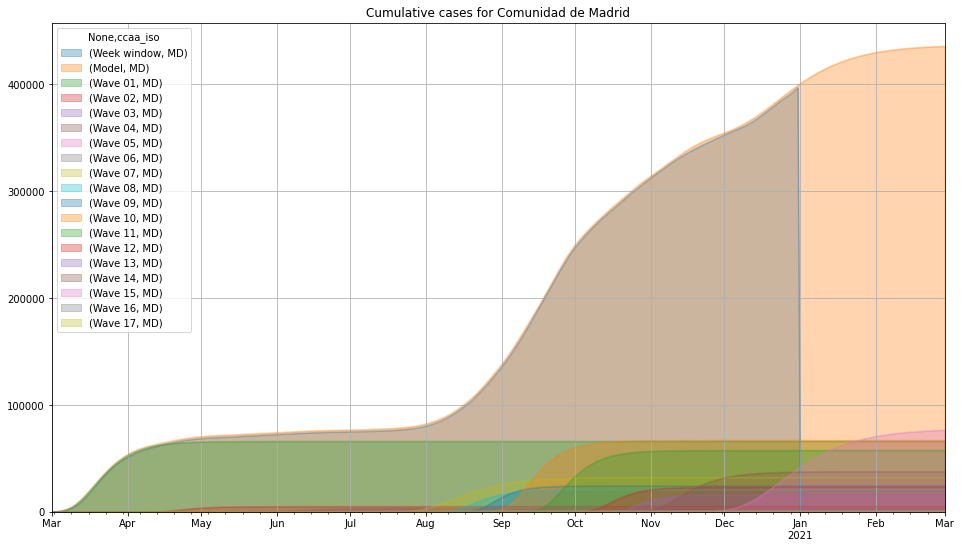

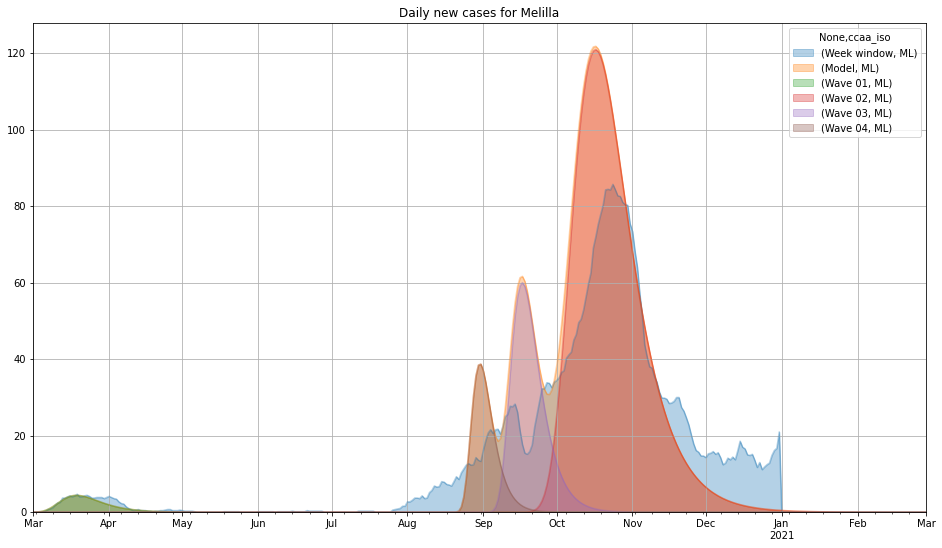

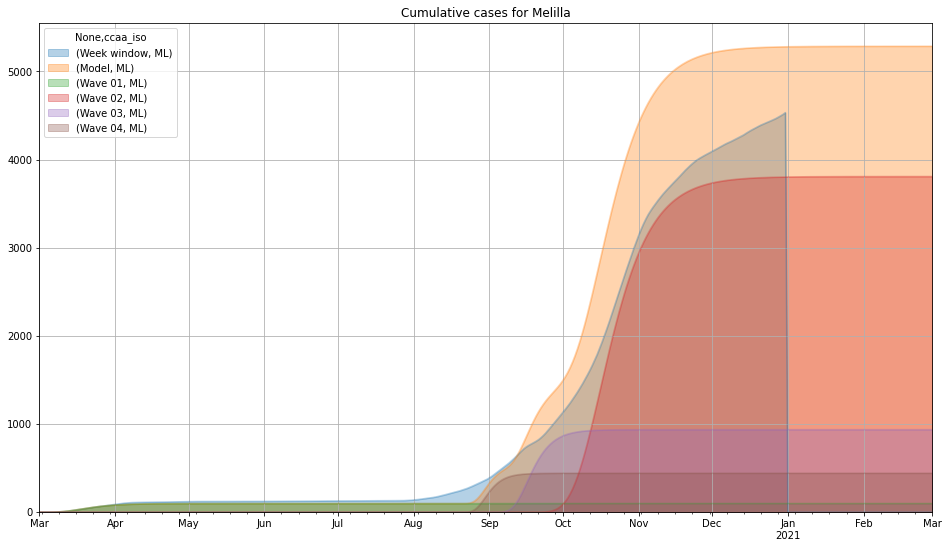

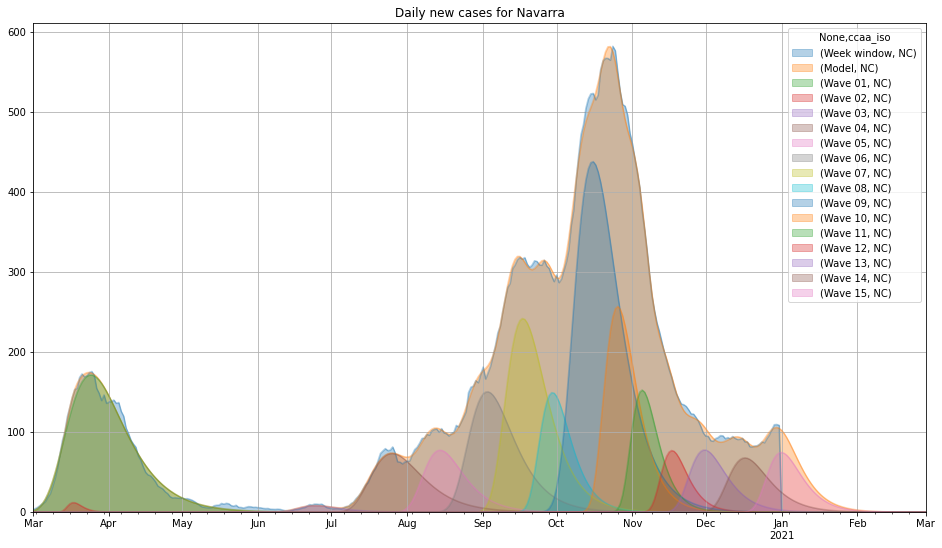

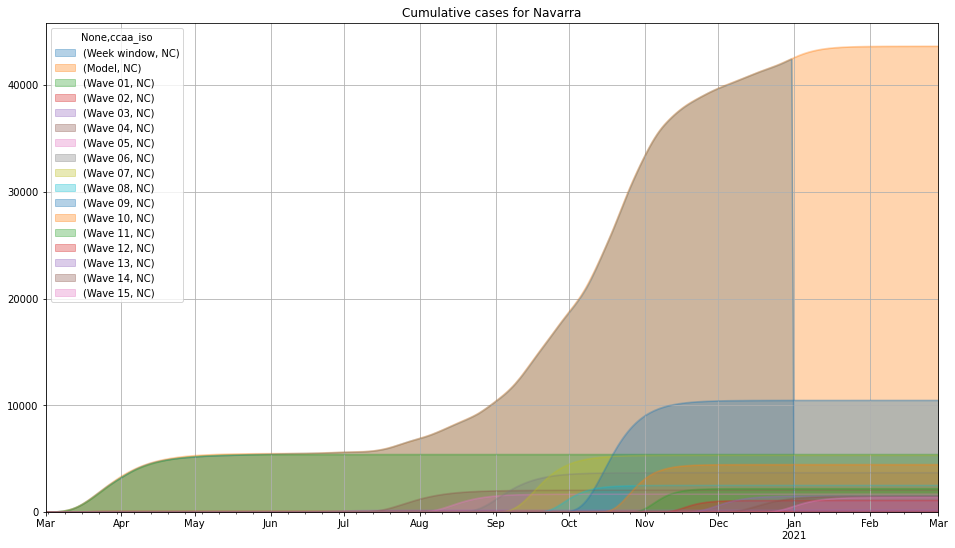

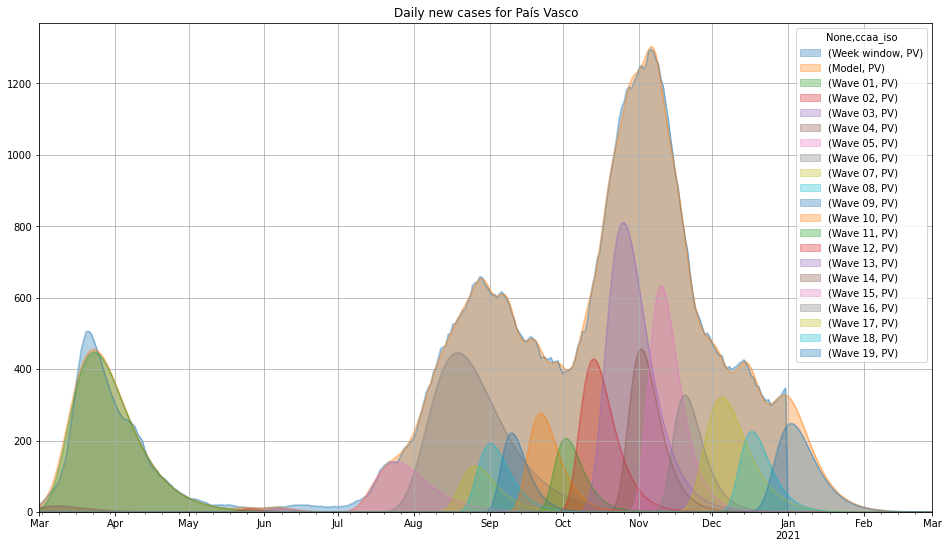

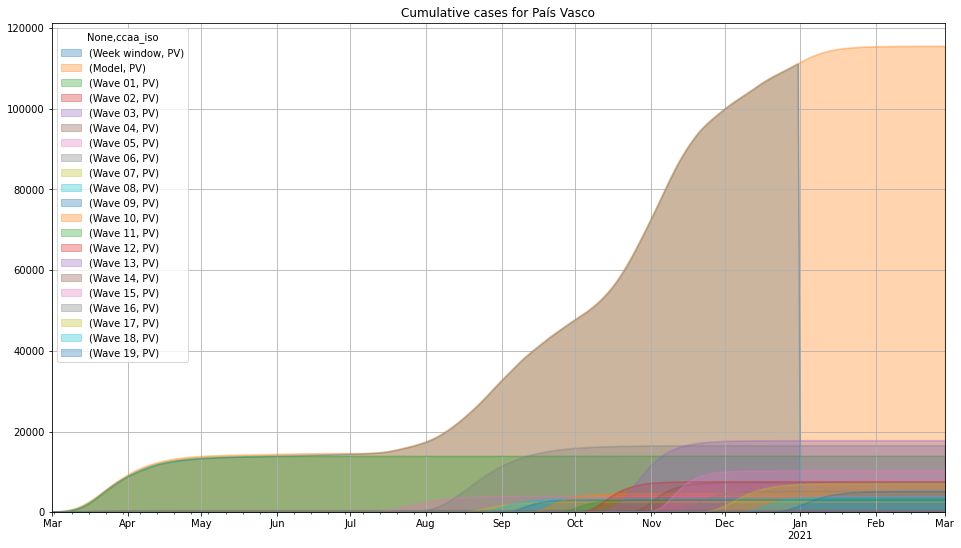

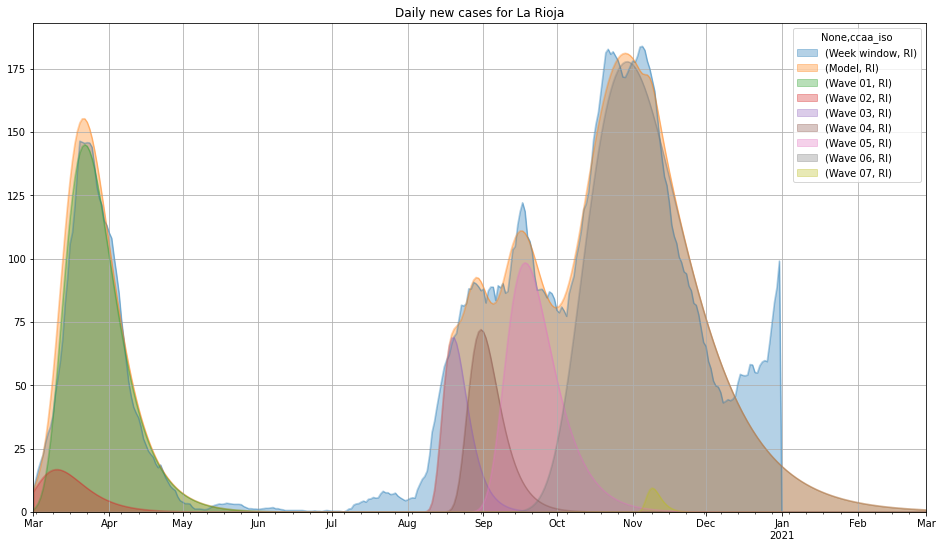

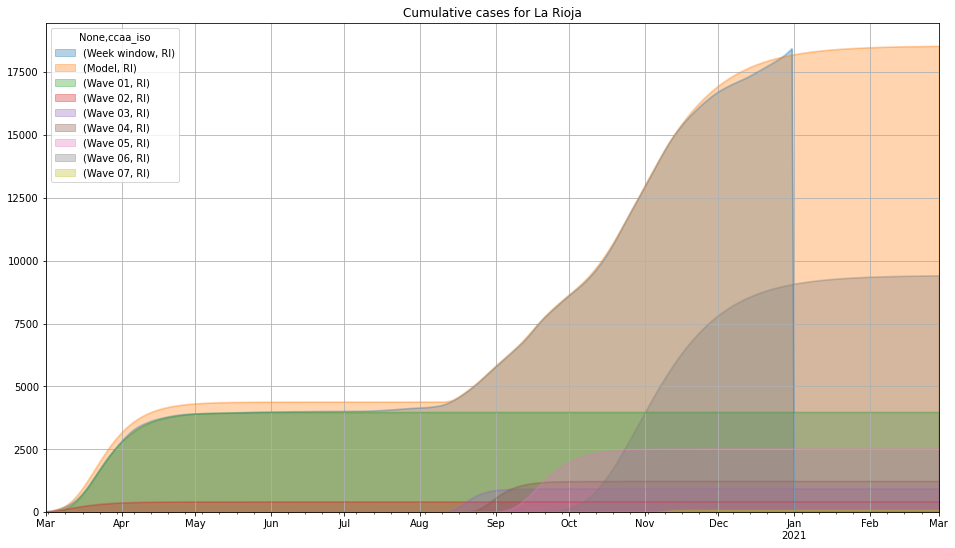

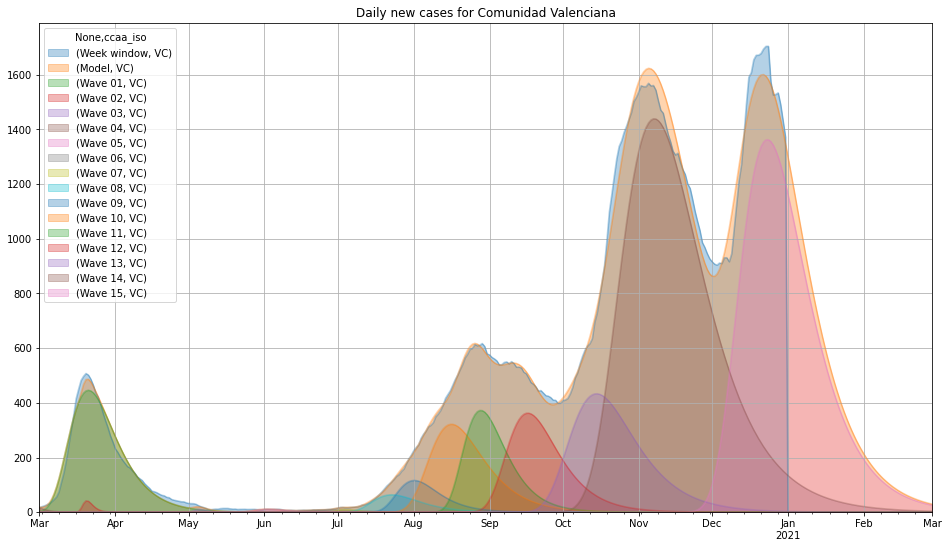

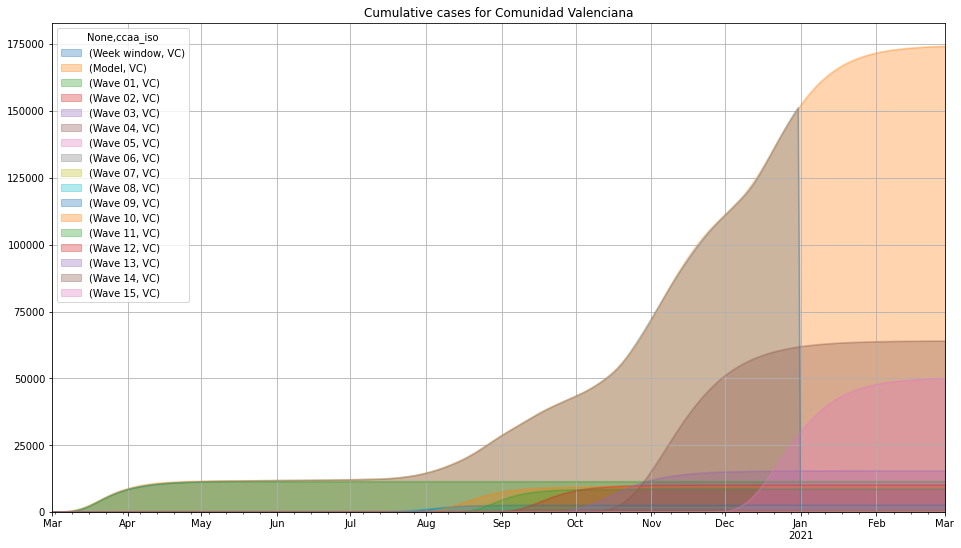

In [11]:
# Select countries to fit.
countries = np.sort(df['ccaa_iso'].unique())
#countries = ['RS', 'IL', 'US', 'UK', 'BR', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE',
#             'NO', 'DK', 'BE', 'NL', 'NZ', 'CN', 'JP', 'RU', 'AT', 'ZA', 'IN', 'KW',
#             'AU', 'BO', 'SD', 'SI']
#countries = ['BB', 'BI', 'BM', 'BZ', 'CF', 'IS', 'JE', 'LV', 'ML', 'NO', 'PF', 'VC']
#countries = ['PR']

# Choose whether to output plots per country.
showplots = True

measure  = 'num_casos'
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for country in countries:

    wave = 1

    df_geo[(pmeasure, country)] = 0
    df_geo[(smeasure, country)] = df_geo[measure][country].loc[:lastdate].rolling(7).mean()
    df_geo[(rmeasure, country)] = df_geo[smeasure][country]

    plotlist = [(smeasure, country), (pmeasure, country)]

    countryname = df_loc[df_loc['COD_CCAA'] == country]['CCAA'].iloc[0]
    #countryname = country
    popdata = 0

    #mincases = popdata / 1e6
    #mincases = 10
    #mincases = df_geo[smeasure][country].sum() / 5000
    mincases = max(popdata / 1e6, 2)

    print('Running multiple wave analysis for {} ({})'.format(
        countryname, country))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, country)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][country]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])
        df_pred = df_pred[(df_pred['linear'] < -0.5) &
                          (df_pred['linear'] > -5.0)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        #eamodel = Earth(minspan=0)
        #eamodel = Earth()
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -1/44) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        df_geo[(curwave, country)] = final * gumpdf(df_geo['daynum'], beta, mu)
        peak = df_geo[df_geo[(curwave, country)] == df_geo[(curwave, country)].max()].index.min()
        start = df_geo[(df_geo[(curwave, country)] >= 1) &
                       (df_geo[(curwave, country)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, country)] < 1) &
                       (df_geo[(curwave, country)].index > peak)].index.min()
        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
        
        df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
        df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]
        plotlist += [(curwave, country)]
        wave += 1
        
    if showplots:
        df_geo[plotlist].loc['20200301':'20210301'].plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Daily new cases for '+countryname)
        df_geo[plotlist].loc['20200301':'20210301'].cumsum().plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Cumulative cases for '+countryname)

In [12]:
df_geo.reset_index(inplace=True)

In [13]:
df_out = df_geo.melt(id_vars=['index'], value_vars=[pmeasure])
df_out.columns = (['date', 'type', 'location', 'value'])
df_out.to_csv('zzcoremc.csv')

Keep exploring! Stay home, wash your hands, keep your distance.